In [94]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister


q = QuantumRegister(1,'qubit')


c = ClassicalRegister(1, 'bi')

print(q)
print(q[0],q)

QuantumRegister(1, 'qubit')
Qubit(QuantumRegister(1, 'qubit'), 0) QuantumRegister(1, 'qubit')


In [95]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(q, c)

circuit.h(q)
circuit.measure(q, c)
circuit.draw()



┌───┐┌─┐
qubit: ┤ H ├┤M├
       └───┘└╥┘
 bi: 1/══════╩═
             0

In [96]:
from qiskit import Aer, execute

backend = Aer.get_backend('statevector_simulator')
job = execute(circuit, backend)
res = job.result()
psi = res.get_statevector()

In [97]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend,shots = 100)
res = job.result()
prob = res.get_counts(circuit)

In [152]:
from qiskit.circuit.library import XGate, IGate
from qiskit.extensions import UnitaryGate

import scipy
import numpy as np
print(prob)

{'00': 100}


## 2 ex


In [205]:

def get_gate(D,Q,typer:int):
    if typer == 0:
        return UnitaryGate(np.kron(D, D))
    elif typer == 1:
        return UnitaryGate(np.kron(Q, D))
    elif typer == 2:
        return UnitaryGate(np.kron(D, Q))
    elif typer == 3:
        return UnitaryGate(np.kron(Q,Q))

gamma = np.linspace(0,np.pi/2,101)



results = {'00':0,'01':0,'10':0,'11':0}
weights = {'00':3,'01':0,'10':5,'11':1}
lst = []
for j in range(4):
    for g in gamma:
        #results = {'00':0,'01':0,'10':0,'11':0}
        payoff = 0
        D = np.array([[0, 1], [-1, 0]])
        Q = np.array([[1j, 0], [0, -1j]])


        J = scipy.linalg.expm(-1.0j * g * np.kron(D, D) / 2)

        gate = UnitaryGate(J)
        gate2 = UnitaryGate(np.conjugate(J).T)


        q = QuantumRegister(2, "qubit")
        c = ClassicalRegister(2, "bi")
        circuit = QuantumCircuit(q, c)

        circuit.append(gate, q)
        gate_3 = get_gate(D,Q,j)
        circuit.append(gate_3,q)
        #what here?!?!?!?

        circuit.append(gate2, q)
        circuit.measure(q, c)


        backend = Aer.get_backend("qasm_simulator")
        job = execute(circuit, backend, shots=1000)
        res = job.result()
        prob = res.get_counts(circuit)
    
        for key in prob.keys():
            payoff += prob[key] * weights[key]

        lst.append(payoff)

In [170]:
circuit.draw()

┌──────────┐┌──────────┐┌──────────┐┌─┐   
qubit_0: ┤0         ├┤0         ├┤0         ├┤M├───
         │  Unitary ││  Unitary ││  Unitary │└╥┘┌─┐
qubit_1: ┤1         ├┤1         ├┤1         ├─╫─┤M├
         └──────────┘└──────────┘└──────────┘ ║ └╥┘
   bi: 2/═════════════════════════════════════╩══╩═
                                              0  1

In [176]:

from matplotlib import pyplot as plt

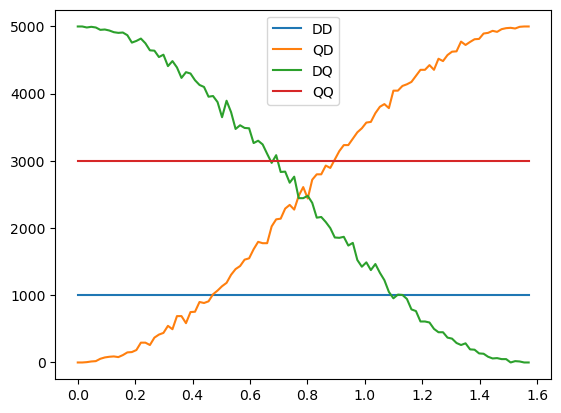

In [206]:
results = np.array(lst)

tmp = len(lst)//4
res_1 = results[0:tmp]
res_2 = results[tmp:2*tmp]
res_3 = results[2*tmp:3*tmp]
res_4 = results[3*tmp:4*tmp]



plt.plot(gamma,res_1,label="DD")
plt.plot(gamma,res_2,label="QD")
plt.plot(gamma,res_3,label="DQ")
plt.plot(gamma,res_4,label="QQ")
plt.legend()

plt.show()